## Germán de los Mozos Romero
01-02-2021

# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

Primero importamos las librerias y funciones necesarias.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #d
!pip install -q findspark 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark 
findspark.init()
# Creamos el contexto spark
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

    # Creamos la sesión de spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

    # Importamos las sesiones
from pyspark.sql.functions import col, avg, desc, sum
from pyspark.sql import SQLContext
from pyspark.sql import Row


In [2]:
sqlContext = SQLContext(sc)

## Carga de datos


In [3]:
raw_datos = sc.textFile("BDpracticafinalCSV.csv")
raw_datos.take(10)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000',
 '5;RL;74;13830;Lvl;Gtl;5;1997;1998;None;TA;TA;928;Gd;Y;2;1;3;1;TA;6;2;482;TA;0;Sp;3;2010;189900',
 '6;RL;78;9978;Lvl;Gtl;6;1998;1998;BrkFace;TA;TA;926;Ex;Y;2;1;3;1;Gd;7;2;470;TA;0;Sp;6;2010;195500',
 '7;RL;41;4920;Lvl;Gtl;8;2001;2001;None;Gd;TA;1338;Ex;Y;2;0;2;1;G

Los datos estan separados por punto y coma. Los títulos de cada columna contienen espacios y estos nos generaran problemas, es por ello que vamos a eliminarlos, modificando el nombre de los titulos manualmente, en caso de que las variables fuesen muchas podríamos utilizar alguna función

In [4]:
 raw_datos= raw_datos.map(lambda x:x.split(";"))
header = raw_datos.first()
raw_datos = raw_datos.filter(lambda x : x != header)

In [5]:
datos = raw_datos.map(lambda p: Row(
    Order = p[0],
    MS_Zoning = p[1],
    Lot_Frontage = p[2],
    Lot_Area = p[3],
    Land_Contour = p[4],
    Land_Slope = p[5],
    Overall_Qual = p[6],
    Year_Built = p[7],
    Year_R_A = p[8],
    Mas_Vnr_Type = p[9],
    Exter_Qual = p[10],
    Bsmt_Cond = p[11],
    Total_Bsmt_SF = p[12],
    Heating_QC = p[13],
    Central_Air = p[14],
    Full_Bath = p[15],
    Half_Bath = p[16],
    Bedroom_AbvGr = p[17],
    Kitchen_AbvGr = p[18],
    Kitchen_Qual = p[19],
    TotRms_AbvGrd = p[20],
    Garage_Cars = p[21],
    Garage_Area = p[22],
    Garage_Cond = p[23],
    Pool_Area = p[24],
    Pool_QC = p[25],
    Mo_Sold = p[26],
    Yr_Sold = p[27],
    Sale_Price = p[28]
    )
)

Pasamos a dataframe para podeer operar con SQL, es decir usamos pyspark.sql. Considero que esta técnica es más sencilla y familiar para mi e igual de efectiva.

In [6]:
inmobiliaria = sqlContext.createDataFrame(datos)
inmobiliaria.registerTempTable("inmobiliaria")

In [7]:
sqlContext.sql("""
    SELECT * 
    FROM inmobiliaria limit 15
""").show()

+-------------+---------+-----------+----------+---------+-----------+-----------+-----------+---------+----------+-------------+------------+------------+----------+--------+------------+---------+------------+-------+-----+------------+---------+-------+----------+-------------+-------------+----------+--------+-------+
|Bedroom_AbvGr|Bsmt_Cond|Central_Air|Exter_Qual|Full_Bath|Garage_Area|Garage_Cars|Garage_Cond|Half_Bath|Heating_QC|Kitchen_AbvGr|Kitchen_Qual|Land_Contour|Land_Slope|Lot_Area|Lot_Frontage|MS_Zoning|Mas_Vnr_Type|Mo_Sold|Order|Overall_Qual|Pool_Area|Pool_QC|Sale_Price|TotRms_AbvGrd|Total_Bsmt_SF|Year_Built|Year_R_A|Yr_Sold|
+-------------+---------+-----------+----------+---------+-----------+-----------+-----------+---------+----------+-------------+------------+------------+----------+--------+------------+---------+------------+-------+-----+------------+---------+-------+----------+-------------+-------------+----------+--------+-------+
|            3|       Gd|   

In [10]:
 datos_filtro = spark.sql("""
SELECT * 
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+-------------+---------+-----------+----------+---------+-----------+-----------+-----------+---------+----------+-------------+------------+------------+----------+--------+------------+---------+------------+-------+-----+------------+---------+-------+----------+-------------+-------------+----------+--------+-------+
|Bedroom_AbvGr|Bsmt_Cond|Central_Air|Exter_Qual|Full_Bath|Garage_Area|Garage_Cars|Garage_Cond|Half_Bath|Heating_QC|Kitchen_AbvGr|Kitchen_Qual|Land_Contour|Land_Slope|Lot_Area|Lot_Frontage|MS_Zoning|Mas_Vnr_Type|Mo_Sold|Order|Overall_Qual|Pool_Area|Pool_QC|Sale_Price|TotRms_AbvGrd|Total_Bsmt_SF|Year_Built|Year_R_A|Yr_Sold|
+-------------+---------+-----------+----------+---------+-----------+-----------+-----------+---------+----------+-------------+------------+------------+----------+--------+------------+---------+------------+-------+-----+------------+---------+-------+----------+-------------+-------------+----------+--------+-------+
|            3|       Gd|   

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Representamos los posibles duplicados

Para elegir y seleccionar el número de viviendas distintas de cada dataset utilizaremos la función select() para seleccionar la columna que queremos, en este caso es "Order" además como queremos que todos los valores sean distintos usaremos la función distinct(). Usaremos la función count para contar cuantos registros son.

Vemos como existirían hasta seis identificadores `Order` que se repiten, además lo comprobamos a continuación a través de la diferencia entre `count` que coge todos los valores y `distinct` unido a la instrucción anterior que solo seleccionar los distintos, siendo seis la diferencia y por ello el número de identificadores repetidos, si seleccionasemos todas las zonas, es decir si no aplicasemos la instrucción where.




In [17]:
inmobiliaria.count()

2936

In [14]:
x = inmobiliaria.select("Order").distinct().count()
x

2930

In [18]:
sqlContext.sql("""
select Order, count(*) as num_repeticiones 
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
group by order
having count(*)>1
""").show()
print("Hay un total de {} viviendas distintas en este dataset.".format(x))

+-----+----------------+
|Order|num_repeticiones|
+-----+----------------+
| 2930|               2|
| 2929|               2|
+-----+----------------+

Hay un total de 2930 viviendas distintas en este dataset.


El número de duplicados es pequeño, y no tendrá mucha trascendencia el hecho de eliminar estas filas o mantenerlas.
Sabemos que "Order" es una variable de identificación, pero no sabemos realmente que es lo que identifica, aunque probablemente sea cada vivienda, lo que nos haría pensar que hay 2 viviendas que estan introducidas en la base de dados dos veces. Si fuesen muchos los duplicados deberíamos eliminar los mismos.

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Agrupo los datos por cada una de las tres zonas y calculo, para cada una, tanto el total de inmuebles en venta como el precio medio del total de estos.





In [19]:
sqlContext.sql("""
select MS_Zoning as Zona, count(Order) as Inmuebles, avg(Sale_Price) as PrecioMedio
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
group by MS_Zoning
""").show()

+----+---------+------------------+
|Zona|Inmuebles|       PrecioMedio|
+----+---------+------------------+
|  RH|       27|136419.77777777778|
|  RL|     2271|191131.80581241744|
|  RM|      462|126781.39393939394|
+----+---------+------------------+



## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Vemos la construcción más antigua y más moderna, y asi poder calcular el rango de décadas que debemos seleccionar.

In [20]:
sqlContext.sql("""
select min(Year_Built) as Antigua, max(Year_Built) as ConstruccionModerna
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show(2)

+-------+-------------------+
|Antigua|ConstruccionModerna|
+-------+-------------------+
|   1872|               2010|
+-------+-------------------+



Diferenciamos por decadas a través utilizando tantos "when" como décadas existen, calculando la media "avg" para cada una de ellas.

In [21]:
sqlContext.sql("""
select avg(Total_Bsmt_SF) as Superficie,
case 
when Year_Built between 1870 and 1879 then '1870s' 
when Year_Built between 1880 and 1889 then '1880s' 
when Year_Built between 1890 and 1899 then '1890s' 
when Year_Built between 1900 and 1909 then '1900s' 
when Year_Built between 1910 and 1919 then '1910s' 
when Year_Built between 1920 and 1929 then '1920s' 
when Year_Built between 1930 and 1939 then '1930s' 
when Year_Built between 1940 and 1949 then '1940s' 
when Year_Built between 1950 and 1959 then '1950s'
when Year_Built between 1960 and 1969 then '1960s' 
when Year_Built between 1970 and 1979 then '1970s' 
when Year_Built between 1980 and 1989 then '1980s' 
when Year_Built between 1990 and 1999 then '1990s' 
else '2000s' 
end as Decada
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
group by Decada
order by Decada
""").show()

+------------------+------+
|        Superficie|Decada|
+------------------+------+
|             761.0| 1870s|
|             836.0| 1880s|
| 885.5833333333334| 1890s|
| 720.1388888888889| 1900s|
| 788.3009708737864| 1910s|
| 833.9368421052632| 1920s|
| 769.9158878504672| 1930s|
| 706.9261744966443| 1940s|
| 968.2955223880597| 1950s|
| 1082.672268907563| 1960s|
|  953.917808219178| 1970s|
|            1086.0| 1980s|
|1138.1054313099041| 1990s|
|1347.7401812688822| 2000s|
+------------------+------+



Para conocer en que década las viviendas estaban mejor acondicionadas, nos basamos en que la calificación sea de Excelente (Ex), cuando más número de esta calificación tenga más arriba aparecera en la tabla que ordenaremos de forma descendente. Al querer conocer que década tiene más calificaciones como excelentes la tabla solo mostrará el top 5.

In [22]:
sqlContext.sql("""
select count(*) as SumatorioEx,
case 
when Year_Built between 1870 and 1879 then '1870s' 
when Year_Built between 1880 and 1889 then '1880s' 
when Year_Built between 1890 and 1899 then '1890s' 
when Year_Built between 1900 and 1909 then '1900s' 
when Year_Built between 1910 and 1919 then '1910s' 
when Year_Built between 1920 and 1929 then '1920s' 
when Year_Built between 1930 and 1939 then '1930s' 
when Year_Built between 1940 and 1949 then '1940s' 
when Year_Built between 1950 and 1959 then '1950s'
when Year_Built between 1960 and 1969 then '1960s' 
when Year_Built between 1970 and 1979 then '1970s' 
when Year_Built between 1980 and 1989 then '1980s' 
when Year_Built between 1990 and 1999 then '1990s' 
else '2000s' 
end as Decada
from inmobiliaria
where Heating_QC = 'Ex'
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
group by Decada
order by SumatorioEx desc
""").show(5)

+-----------+------+
|SumatorioEx|Decada|
+-----------+------+
|        643| 2000s|
|        234| 1990s|
|        133| 1920s|
|        126| 1970s|
|        118| 1950s|
+-----------+------+
only showing top 5 rows



Claramente las mejores viviendas, tal y como podiamos sospechar son las más recientes, es decir las de la última década, los 2000. Precededida en tiempo y calidad de los 90s.

## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Seleccionamos cada vivienda con su ratio precio/superficie, y lo ordenamos de mayor a menor (descendentemente), seleccionando las 10 primeras.

In [23]:
casas_caras2009 = sqlContext.sql("""
select Order as Casa, (Sale_Price/Lot_Area) as PrecioSuperficie
from inmobiliaria 
where Yr_Sold = '2009'
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
order by PrecioSuperficie desc
""")

In [24]:
casas_caras2009.show(10)

+----+-----------------+
|Casa| PrecioSuperficie|
+----+-----------------+
| 936|95.38461538461539|
| 934|92.06989247311827|
|2885|78.08433107756377|
|1544|77.43589743589743|
|1561|76.62347124642207|
| 464|76.27865961199295|
| 935|75.06203473945409|
|2425|       73.2421875|
|1563|71.57730348776678|
| 408|71.13095238095238|
+----+-----------------+
only showing top 10 rows



Esta tabla muestra que casas son las más caras en base a la superficie de cada una de ellas. Siendo el ratio más alto de precio/superficie de 95.38, correspondiente al identificador de la Casa 936.

## Media anual por zonas del precio de venta y metros cuadrados.

Selecciono la media anual tanto de los precios de venta como de la superficie, agrupandolos por zona para cada uno de los años.

Los valores que aparecen en Lot_Area estan en pies cuadrados, por lo tanto debemos convertirlos a metros cuadrados, sabiendo que un pie cuadrado equivale a 0.093 metros cuadrados.

In [34]:
sqlContext.sql("""
select Yr_Sold as Year, avg(Sale_Price) AS PrecioMedio, avg(Lot_Area) *0.093   as SuperficieMedia, MS_Zoning as Zona 
from inmobiliaria
WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
group by Zona, Year
""").show()

+----+------------------+------------------+----+
|Year|       PrecioMedio|   SuperficieMedia|Zona|
+----+------------------+------------------+----+
|2007|128947.62105263158| 626.1014526315789|  RM|
|2010|  184978.418972332|1012.4152766798419|  RL|
|2009|190455.55086372362|1003.2304491362764|  RL|
|2008|150333.33333333334| 766.9399999999999|  RH|
|2009|          116206.8|          647.8194|  RH|
|2007|193399.98014440434|1060.7843555956679|  RL|
|2006|193654.14845360824|1043.9037154639175|  RL|
|2010|          126280.0| 753.8208000000001|  RH|
|2008| 133336.1219512195| 624.3203414634146|  RM|
|2006|140316.66666666666|          660.2535|  RH|
|2010|119681.70689655172| 586.7161551724138|  RM|
|2007|          147250.0|         651.99975|  RH|
|2008|189885.58515283844| 1048.747192139738|  RL|
|2006|127502.63725490196| 575.6143823529412|  RM|
|2009|118759.86904761905|           553.133|  RM|
+----+------------------+------------------+----+



## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Recogemos la recaudación total en función del revestimiento. Por una parte, de ladrillo visto y de ladrillo normal, y por otra, de piedra.

In [26]:
sqlContext.sql("""
select sum(Sale_Price) as Piedra
from inmobiliaria
where Mas_Vnr_Type = 'Stone' 
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+------------+
|      Piedra|
+------------+
|1.17516851E8|
+------------+



In [27]:
sqlContext.sql("""
select sum(Sale_Price) as Ladrillo
from inmobiliaria
where Mas_Vnr_Type = 'BrkCmn' or Mas_Vnr_Type = 'BrkFace'
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+------------+
|    Ladrillo|
+------------+
|2.33939173E8|
+------------+



Podemos apreciar como el total de la recaudación de las casas de piedra respecto a las de ladrillo es inferior, incluso menor de la mitad.

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

Primer tipo de vivienda, con 2 cocinar y con 2 o más plazas de garaje.

In [28]:
vivienda1 = sqlContext.sql("""
select avg(Sale_Price) as Precio
from inmobiliaria
where Garage_Cars >= 2 and Kitchen_AbvGr = 2
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+------------------+
|            Precio|
+------------------+
|129564.72101449275|
+------------------+



Segundo tipo de vivienda, con 1 cocina y 1 plaza de garaje.

In [29]:
vivienda2 = sqlContext.sql("""
select avg(Sale_Price) as Precio
from inmobiliaria
where Garage_Cars = 1 and Kitchen_AbvGr = 1
and MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+------------------+
|            Precio|
+------------------+
|130784.10392156863|
+------------------+



La diferencia media de ambas en estas dos zonas es practicamente nula, para realmente el cambio que existe entre tener 2 cocinas y 2 plazas de garajes.
Esta cuestión me parece muy extraña, ya que no concibo el motivo por el que una casa con menos plazas de garaje por ejemplo fuese a ser igual o más barata que las que tienen una sola plaza.





## (COMPLEMENTARIA) 
Estudiar la relación entre el precio y el número de Garajes. 

In [30]:
garajes = inmobiliaria.select("Sale_Price", "Garage_Cars") \
    .groupBy("Garage_cars").agg(avg("Sale_Price"))
    
garajes.show(5)

+-----------+------------------+
|Garage_cars|   avg(Sale_Price)|
+-----------+------------------+
|          3|310011.74801061006|
|          0|104949.25477707006|
|          5|          126500.0|
|          1|127267.42287917738|
|          4|       228748.6875|
+-----------+------------------+
only showing top 5 rows



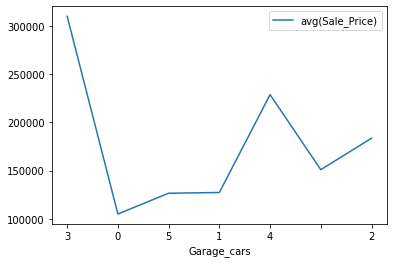

In [31]:
# Importamos pandas
import pandas as  pd

 # Pasamos el dataset anterior a formato pandas para plotearlo
pd_garajes = garajes.toPandas()

# Graficamos

pd_garajes.plot(x="Garage_cars", y="avg(Sale_Price)")

A través de este gráfico podemos observar como las casas con 3 garajes, en media tiene un precio superior, y como no podía ser de otra forma, las viviendas sin garaje son las más baratas.